In [20]:
# Create data frames
import pandas as pd
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_cleveland = pd.read_csv('cleveland.data', na_values='?', names=columns)
df_hungarian = pd.read_csv('hungary.data', na_values='?', names=columns)
df_long_beach_va = pd.read_csv('long_beach_va.data', na_values='?', names=columns)
df_switzerland = pd.read_csv('switzerland.data', na_values='?', names=columns)

In [21]:
# Add origin column to each DataFrame
df_cleveland['origin'] = 'Cleveland'
df_hungarian['origin'] = 'Hungary'
df_long_beach_va['origin'] = 'Long Beach VA'
df_switzerland['origin'] = 'Switzerland'

In [22]:
# Combine all DataFrames
df_combined = pd.concat([df_cleveland, df_hungarian, df_switzerland, df_long_beach_va])

In [23]:
df_combined['target'] = (df_combined['num'] > 0).astype(int)

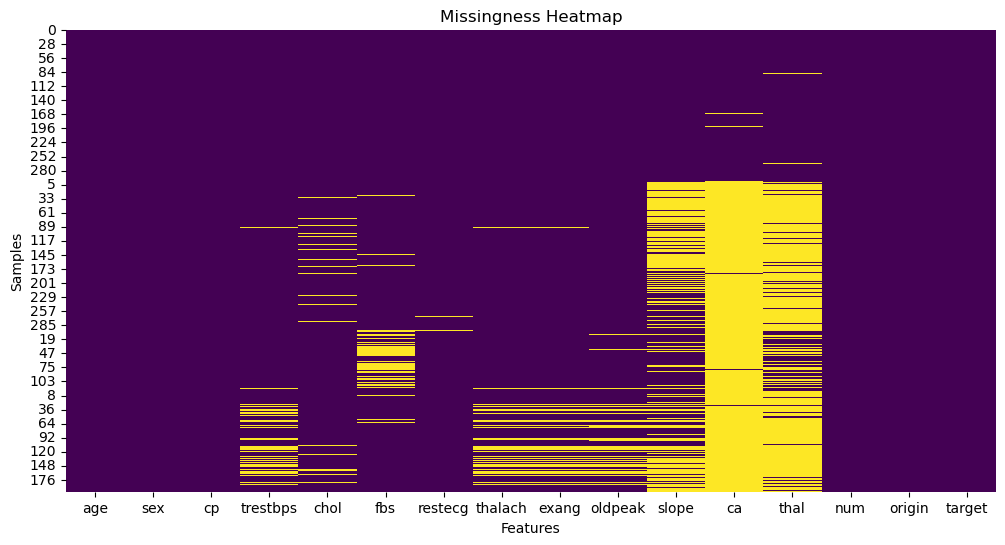

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missingness Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_combined.isnull(), cbar=False, cmap='viridis')
plt.title('Missingness Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

In [25]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 199
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  num       920 non-null    int64  
 14  origin    920 non-null    object 
 15  target    920 non-null    int64  
dtypes: float64(13), int64(2), object(1)
memory usage: 122.2+ KB


In [26]:
missing_counts_by_origin = df_combined.groupby("origin").apply(lambda g: g.isna().sum())

<positron-console-cell-26>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


<positron-console-cell-27>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



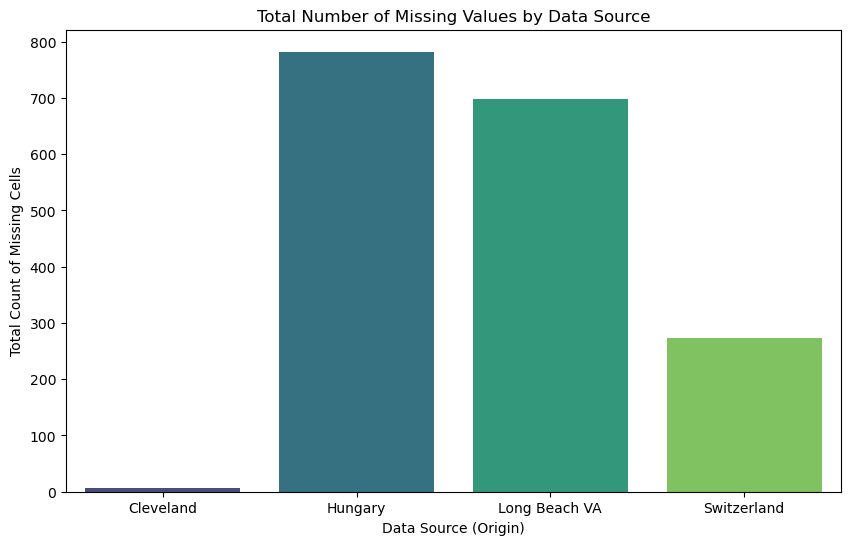

In [27]:
# --- Run this code in the next cell ---

# First, let's get the total number of missing values for each origin by summing across the columns (axis=1)
total_missing_by_origin = missing_counts_by_origin.sum(axis=1)

# Now, let's create a bar plot to visualize these totals
plt.figure(figsize=(10, 6))
sns.barplot(x=total_missing_by_origin.index, y=total_missing_by_origin.values, palette="viridis")
plt.title('Total Number of Missing Values by Data Source')
plt.xlabel('Data Source (Origin)')
plt.ylabel('Total Count of Missing Cells')
plt.show()